<h2> K Nearest Neighbours - KNN 

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#load iris dataset
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data # features
y=iris.target # target

In [2]:
#print(iris)
#print description
print(iris.DESCR)
#preprocessing the dataset


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 \
                                                   , random_state =23)
print(iris.data.shape)
print('Training Set', len(X_train))
print('Test Set', len(X_test))

(150, 4)
Training Set 120
Test Set 30


In [4]:
#to train the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
# Try with n_neighbors=60, n_neighbors=5
# Check if it is overfitting or underfitting the model.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [5]:
#make prediction on test data, Classify
y_pred=knn.predict(X_test)
print(y_pred)

[2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 1 1 1 2 0 2 0 0 0 2 0 0 2 1 1]


In [6]:
#compare the accuracy between the predicted and the actual output y_test
from sklearn import metrics
print("accuracy=",metrics.accuracy_score(y_pred,y_test))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy= 0.9666666666666667
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [7]:
#to compare the actual and predicted are correct or wrong
predicted=knn.predict(X_test)
#create a list for all the predicted one target name
pre_target=[iris.target_names[i] for i in predicted]
print("pre_target=",pre_target,"\n\n")
#create a list for all the target names of y_test data
actual_target=[iris.target_names[i] for i in y_test]
print("actual_target =",actual_target,"\n\n")
print("\t Predicted","\t\tActual","\t\t\tAnswer")
for i in range(0,len(pre_target)):
    print(i,":",pre_target[i],"\t\t",actual_target[i],"\t\t",end='\t')
    if(pre_target[i]==actual_target[i]):
        print("Yes")
    else:
        print("No")

pre_target= ['virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor'] 


actual_target = ['virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor'] 


	 Predicted 		Actual 			Answer
0 : virginica 		 virginica 			Yes
1 : virginica 		 virginica 			Yes
2 : versicolor 		 versicolor 			Yes
3 : setosa 		 setosa 			Yes
4 : virginica 		 virginica 			Yes
5 : versicolor 		 versicolor 			Yes
6 : se

In [8]:
#checking with any one sample
# Just for understanding.
sam=[X_test[18]]
a=knn.predict(sam)
print(a)
sam1=[y_test[18]]
print(sam1)
if(a==sam1):
    print("correct")
else:
    print("wrong")

[2]
[2]
correct


In [9]:
#Visualization
# Just for understanding.
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
iris=load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y = pd.DataFrame(iris.target)
Y.columns = ['Targets']


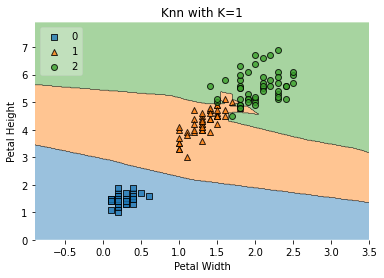

In [10]:
k=1
import matplotlib.pyplot as plt
x = X[['Petal_Width', 'Petal_Length']].values
y = Y['Targets'].astype(int).values
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x, y)
# Plotting decision region
plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
plt.xlabel('Petal Width')
plt.ylabel('Petal Height')
plt.title(f'Knn with K={k}')
plt.show()